# Quick Start - CCDS Template

This notebook runs the complete flow of a typical Data Science project following the CCDS format.

## 1. Setup

Change the params into [params.yaml](../params.yaml)

To run the entire pipeline, use the CLI command below:

```bash
poetry run experiment

In [1]:
import cvae

2025-09-20 19:22:58.906 | INFO     | cvae.config:<module>:27 - PROJ_ROOT path is: C:\Repositories\cvae-mnist


Using device: cpu


In [2]:
import time
import random

start_time = time.time()

## 2. Load Raw Data

In [3]:
cvae.prepare_data()

2025-09-20 19:23:00.076 | INFO     | cvae.service.dataset:main:30 - Starting dataset processing...
Saved C:\Repositories\cvae-mnist\data\processed\mnist_train.pt with 60000 samples.
Saved C:\Repositories\cvae-mnist\data\processed\mnist_test.pt with 10000 samples.
2025-09-20 19:23:25.266 | SUCCESS  | cvae.service.dataset:main:40 - Processing dataset complete. Elapsed time: 25.19 seconds


## 3. Model Training

In [4]:
cvae.train_model()

2025-09-20 19:23:25.286 | INFO     | cvae.service.train:main:79 - Training CVAE model...
2025-09-20 19:23:25.429 | INFO     | cvae.service.train:main:86 - Dataset loaded, batch_size: 128.
2025-09-20 19:23:25.439 | INFO     | cvae.service.train:main:92 - Model initialized. Device: cpu, input_channels: 1, latent_dim: 100, num_classes: 10.
2025-09-20 19:23:25.440 | INFO     | cvae.service.train:main:97 - Starting to train. lr: 0.001, epochs: 10.


 10%|█         | 1/10 [00:59<08:53, 59.23s/it]

2025-09-20 19:24:24.674 | INFO     | cvae.service.train:main:121 - Epoch [1/10], Loss: 172.1877


 20%|██        | 2/10 [01:49<07:12, 54.04s/it]

2025-09-20 19:25:15.077 | INFO     | cvae.service.train:main:121 - Epoch [2/10], Loss: 99.6853


 30%|███       | 3/10 [02:41<06:11, 53.09s/it]

2025-09-20 19:26:07.040 | INFO     | cvae.service.train:main:121 - Epoch [3/10], Loss: 91.4908


 40%|████      | 4/10 [03:35<05:20, 53.41s/it]

2025-09-20 19:27:00.933 | INFO     | cvae.service.train:main:121 - Epoch [4/10], Loss: 88.6469


 50%|█████     | 5/10 [04:28<04:26, 53.26s/it]

2025-09-20 19:27:53.941 | INFO     | cvae.service.train:main:121 - Epoch [5/10], Loss: 87.0742


 60%|██████    | 6/10 [05:23<03:34, 53.71s/it]

2025-09-20 19:28:48.516 | INFO     | cvae.service.train:main:121 - Epoch [6/10], Loss: 86.0896


 70%|███████   | 7/10 [06:20<02:45, 55.08s/it]

2025-09-20 19:29:46.427 | INFO     | cvae.service.train:main:121 - Epoch [7/10], Loss: 85.2745


 80%|████████  | 8/10 [07:16<01:50, 55.13s/it]

2025-09-20 19:30:41.653 | INFO     | cvae.service.train:main:121 - Epoch [8/10], Loss: 84.6602


 90%|█████████ | 9/10 [08:10<00:54, 54.72s/it]

2025-09-20 19:31:35.472 | INFO     | cvae.service.train:main:121 - Epoch [9/10], Loss: 84.2404


100%|██████████| 10/10 [09:03<00:00, 54.39s/it]

2025-09-20 19:32:29.356 | INFO     | cvae.service.train:main:121 - Epoch [10/10], Loss: 83.7549
2025-09-20 19:32:29.362 | INFO     | cvae.service.utils:save_model:31 - Saving the model.
2025-09-20 19:32:29.372 | SUCCESS  | cvae.service.train:main:129 - Training complete. Elapsed time: 544.09 seconds


## 4. Evaluation

In [5]:
cvae.evaluate_model()

2025-09-20 19:32:29.397 | INFO     | cvae.service.eval:main:80 - Loading test data and model for evaluation...
2025-09-20 19:32:36.938 | INFO     | cvae.service.eval:main:123 - Eval metrics — images: 10000, BCE/img: 67.6687, MSE/img: 6.450374, SSIM: 0.9152, PSNR: 21.50dB
2025-09-20 19:32:36.939 | SUCCESS  | cvae.service.eval:main:150 - Saved metrics to C:\Repositories\cvae-mnist\reports\eval_metrics.csv


## 5. Generate

In [6]:
digit= random.randint(0,9)
print(f"Generating image for digit: {digit}")

Generating image for digit: 6


2025-09-20 19:32:36.986 | INFO     | cvae.service.gen:main:141 - Running inference...
2025-09-20 19:32:36.987 | INFO     | cvae.service.gen:model_fn:19 - Starting model_fn to load the model.
2025-09-20 19:32:36.987 | INFO     | cvae.service.gen:model_fn:26 - Model parameters: latent_dim=100, num_classes=10, input_channels=1
2025-09-20 19:32:37.001 | INFO     | cvae.service.gen:model_fn:32 - CVAE model initialized.
2025-09-20 19:32:37.001 | INFO     | cvae.service.gen:model_fn:36 - Loading model state from: C:\Repositories\cvae-mnist\models\model.pth
2025-09-20 19:32:37.095 | INFO     | cvae.service.gen:model_fn:40 - Model state loaded successfully.
2025-09-20 19:32:37.095 | INFO     | cvae.service.gen:model_fn:46 - Model set to evaluation mode.
2025-09-20 19:32:37.095 | INFO     | cvae.service.gen:predict_fn:93 - Starting prediction with input: 6
2025-09-20 19:32:37.095 | INFO     | cvae.service.gen:predict_fn:98 - latent_dim=100, num_classes=10
2025-09-20 19:32:37.096 | INFO     | cva

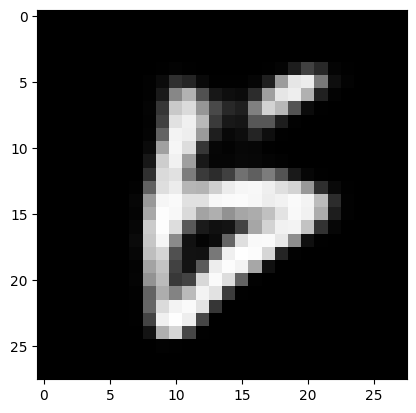

In [7]:
cvae.generate_digit(digit=digit)

## 6. Plot results

2025-09-20 19:32:37.794 | INFO     | cvae.service.plots:main:17 - Generating plot from data...
2025-09-20 19:32:38.265 | INFO     | cvae.service.gen:model_fn:19 - Starting model_fn to load the model.
2025-09-20 19:32:38.265 | INFO     | cvae.service.gen:model_fn:26 - Model parameters: latent_dim=100, num_classes=10, input_channels=1
2025-09-20 19:32:38.273 | INFO     | cvae.service.gen:model_fn:32 - CVAE model initialized.
2025-09-20 19:32:38.273 | INFO     | cvae.service.gen:model_fn:36 - Loading model state from: C:\Repositories\cvae-mnist\models\model.pth
2025-09-20 19:32:38.281 | INFO     | cvae.service.gen:model_fn:40 - Model state loaded successfully.
2025-09-20 19:32:38.281 | INFO     | cvae.service.gen:model_fn:46 - Model set to evaluation mode.
2025-09-20 19:32:38.304 | INFO     | cvae.service.gen:model_fn:19 - Starting model_fn to load the model.
2025-09-20 19:32:38.304 | INFO     | cvae.service.gen:model_fn:26 - Model parameters: latent_dim=100, num_classes=10, input_channel

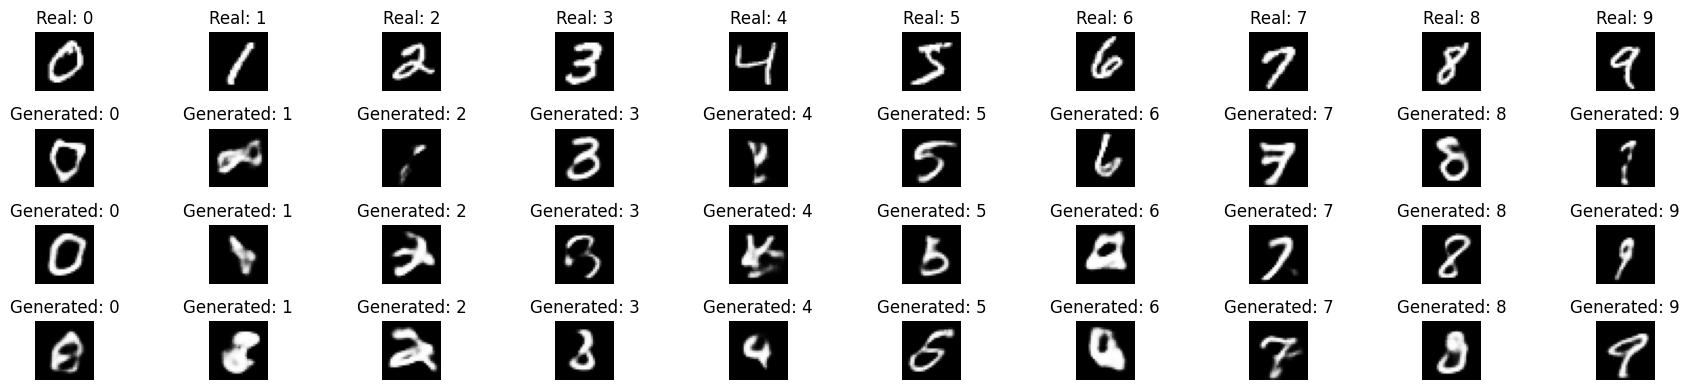

2025-09-20 19:32:40.312 | SUCCESS  | cvae.service.plots:main:62 - Plot generation complete. Elapsed time: 2.52 seconds


In [8]:
cvae.plot_results()

## 7. Run Experiment

In [9]:
end_time = time.time()

In [10]:
from cvae.service.experiment import save_experiment

In [11]:
save_experiment(end_time - start_time)